In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the Dataset.

In [2]:
DF = pd.read_csv('avocado.csv')

In [3]:
DF.shape 

(18249, 14)

This shows that 18249 rows and 14 columns are present in the dataset

In [4]:
DF

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


#### Feature column data type indicates that feature data are a mix of continuous and categorical data ,while target / label ('AveragePrice') data type indicates that dependent variable data is continuous in nature.

#### Checking for null / values missing

In [5]:
DF.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There are No null values / values missing from any of the columns in the dataframe.

### Dataframe Description:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold




Inspiration /Label 

The task is to make a model that can consider the data provided and predict the Average Price.

#### Removing 'Unnamed column' since it is an unnecessary column in the dataframe.

In [6]:
DF.drop(columns = ['Unnamed: 0'],inplace = True)

In [7]:
DF.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### Getting the basic summary and statistical information of the data.

In [8]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


Date is object type and has date type of data .

AveragePrice is float type and is continuous data.

Total Volume is float type and is continuous data.

4046 is float type and is continuous data.

4225 is float type and is continuous data.

4770 is float type and is continuous data.

Total Bags is float type and is continuous data.

Small Bags is float type and is continuous data.

Large Bags is float type and is continuous data.

XLarge Bags is float type and is continuous data.

type is object type and is categorical data.

year is object type and is categorical data.

region is object type and is categorical data.

In [9]:
DF.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


From the above description it is observed that columns like Large Bags and XLarge Bags may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

A higher Std than mean in Total Bags, Small Bags and, XLarge Bags columns indicates skewness.

In [10]:
DF.nunique() #Checking for unique elements in each of the columns

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Categorical columns:

type has 2 unique categories

region has 54 unique categories

year has 4 discrete values    


### This is a Regression Problem since the Target variable / Label column ("AveragePrice") has Continuous type of Data.

### Interpreting Relationship between Dependent and Independent Variables

#### Analyzing the Target Variable

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

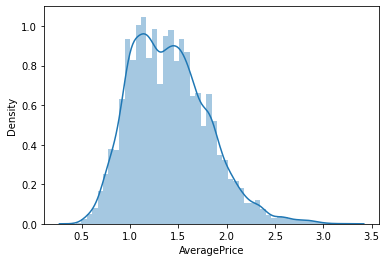

In [11]:
sns.distplot(DF.AveragePrice)

In [12]:
DF.AveragePrice.skew()

0.5803027378878419

From the graph above it is observed that the AveragePrice data forms a continuous distribution with mean of 1.405978 and tails off from 2.5 mark.

#### Analyzing the Feature Columns

In [13]:
DF.type.unique()

array(['conventional', 'organic'], dtype=object)

'type' columns has 2 unique categories : 'conventional' and 'organic'.

In [14]:
DF.type.value_counts() # to find the total values contained in each of the 2 categories.

conventional    9126
organic         9123
Name: type, dtype: int64

conventional  has  9126 values

organic  has  9123 values

<AxesSubplot:xlabel='type', ylabel='count'>

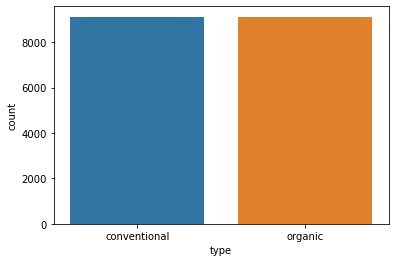

In [15]:
sns.countplot(DF.type)

Nearly equal numbers of conventional and organic avocados were produced.

In [16]:
DF.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

The dataset covers data from 4 years : 2015, 2016, 2017, 2018

<AxesSubplot:xlabel='year', ylabel='count'>

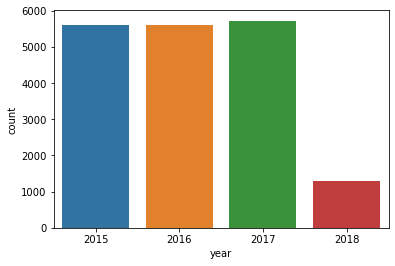

In [17]:
sns.countplot(DF.year)

very small amount of data is available for 2018

In [18]:
DF.region.nunique()

54

region column has 54 unique categories

In [19]:
DF.region.value_counts()

DallasFtWorth          338
RaleighGreensboro      338
StLouis                338
LasVegas               338
Sacramento             338
CincinnatiDayton       338
NewYork                338
BuffaloRochester       338
Boise                  338
Pittsburgh             338
GreatLakes             338
SouthCarolina          338
NewOrleansMobile       338
Portland               338
Louisville             338
Nashville              338
Columbus               338
California             338
Northeast              338
BaltimoreWashington    338
Seattle                338
SouthCentral           338
West                   338
SanDiego               338
Orlando                338
Tampa                  338
Midsouth               338
Jacksonville           338
Detroit                338
Spokane                338
MiamiFtLauderdale      338
Indianapolis           338
NorthernNewEngland     338
Philadelphia           338
Albany                 338
GrandRapids            338
RichmondNorfolk        338
B

In [20]:
DF.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [21]:
DFtest = DF.head(300) #taking a small sample of the main dataframe to analyse the data in the continuous type feature columns

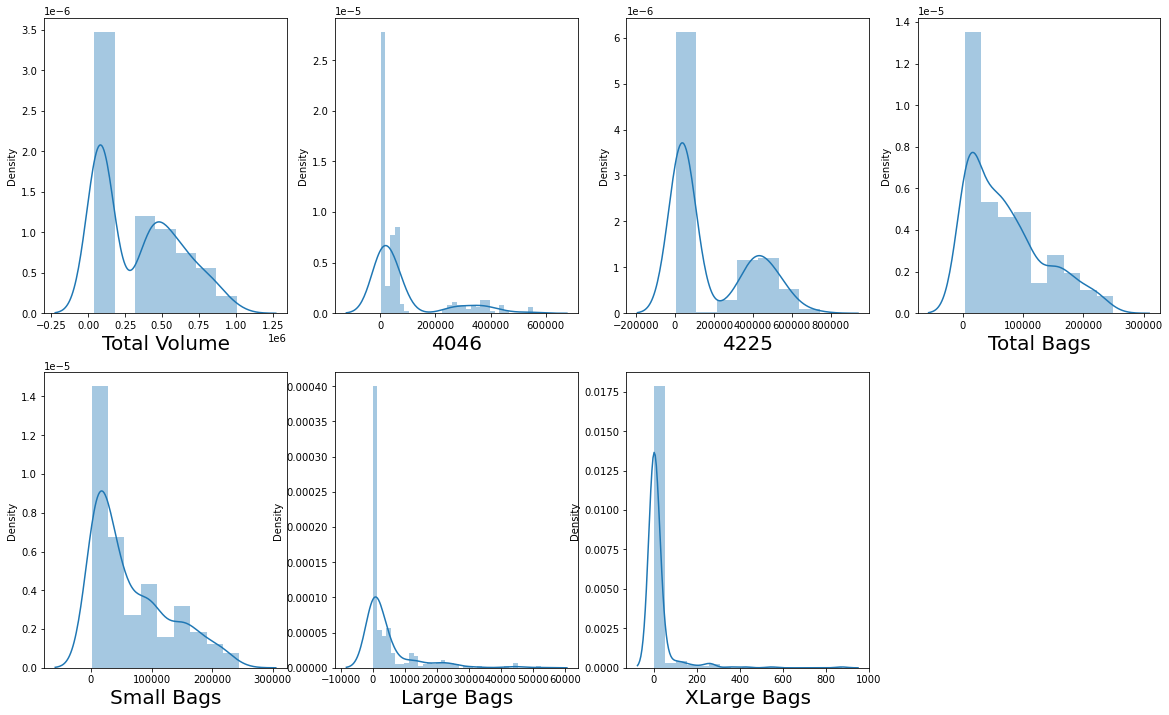

In [22]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in DFtest[['Total Volume','4046','4225','Total Bags','Small Bags','Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(DFtest[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Total Volume, 4046, 4225 show a bimodal data distribution

Total Bags, Large Bags,Small Bags and, XLarge Bags columns have skewed data distribution

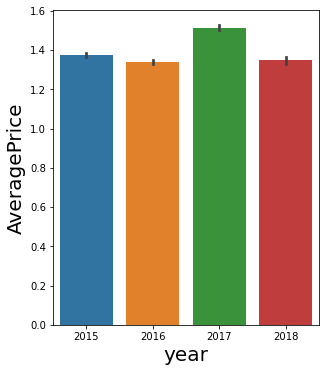

In [23]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF['AveragePrice']
X = DF[['year']]
for col in X:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X[col],y)
        plt.xlabel(col,fontsize=20)
        plt.ylabel('AveragePrice',fontsize=20)
    plotnum+=1
plt.tight_layout()

It is observed that there was a spike in average price in the year 2017

Grouping the data date-wise to better understand the relationship between 'Date' and 'AveragePrice'

Text(0.5, 1.0, 'Average Price Trend')

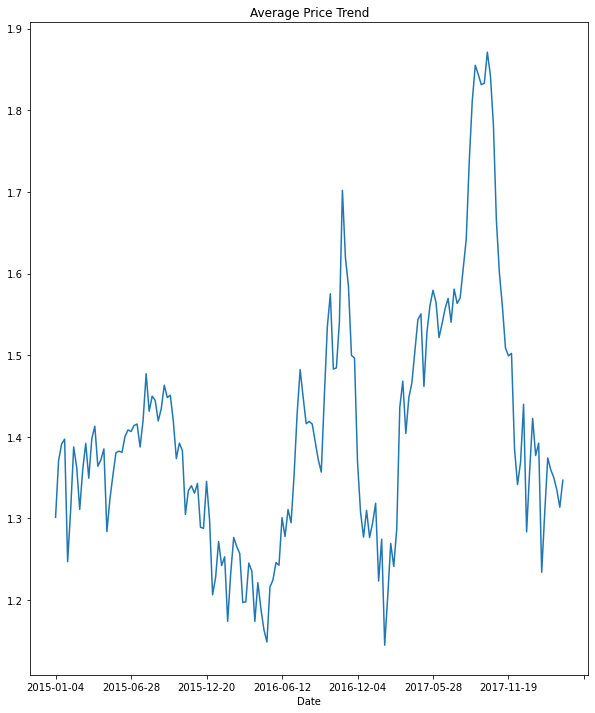

In [24]:
plt.figure(figsize=(10,12))
DF.groupby('Date').mean()['AveragePrice'].plot()
plt.title('Average Price Trend')

It is observed from the graph above that the average price declined steeply from June of 2015 to June of 2016.
The Average price hit the highest point in 2017

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

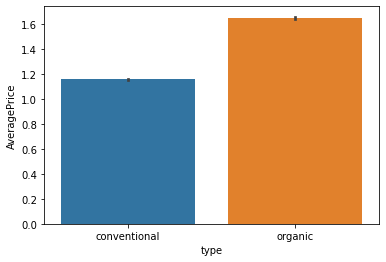

In [25]:
sns.barplot(x = 'type', y = 'AveragePrice', data = DF)

Average price of 'Organic' produce is higher than that of 'conventional' produce.

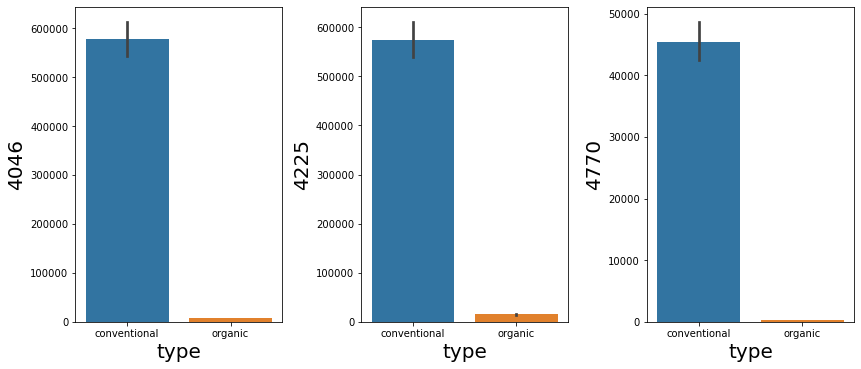

In [26]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF[['4046','4225','4770']]
X = DF['type']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('type',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

production of conventional type outnumbers that of organic type in the cases of 4046,4225 and 4770, which may also be a contributing factor to the higher average price of organic type.

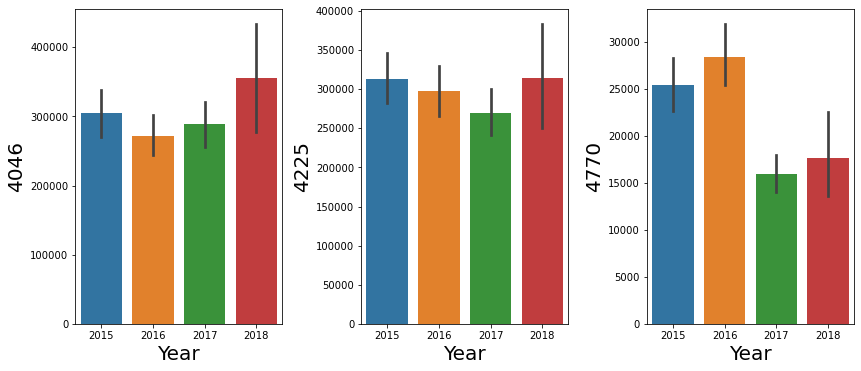

In [27]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF[['4046','4225','4770']]
X = DF['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and  PLU 4770, which is least produced. 

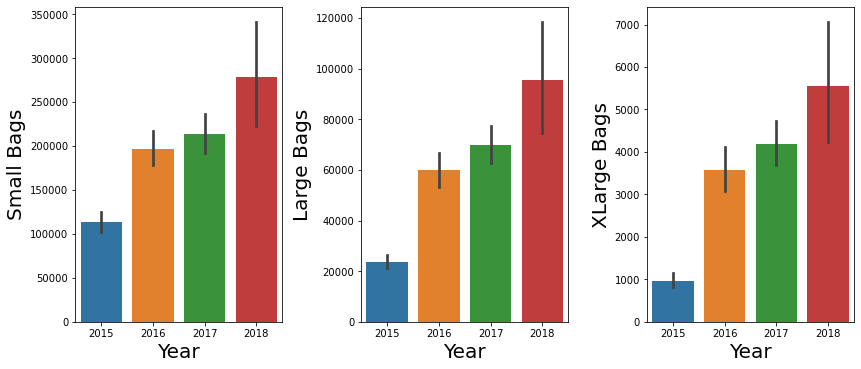

In [28]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
y = DF[['Small Bags','Large Bags','XLarge Bags']]
X = DF['year']
for col in y:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Production of all 3 types of bags has grown over the years. However Small Bags are produced far more than Large and Xlarge bags, while XLarge Bags are produced the least. 

In [29]:
DF.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##### From the above dataframe, it can be observed that:
    
##### Column 'Total Volume' is '4046'+'4225'+'4770'+'Total Bags'. Therefore dropping it as it is a highly dependent Feature.


#####  From the above dataframe, it can be observed that:
#####  Column 'Total Bags' is  'Small Bags' +	'Large Bags	' + 'XLarge Bags'. Therefore dropping it as it is a highly dependent Feature.
(eg: Small Bags : 8603.62+ Large Bags: 93.25+ XLarge Bags: 0.0 = 8696.87(Total Bags)

#### Creating 'Day' and 'Month' columns from 'Date' Columnn

In [30]:
DF['Date']=pd.to_datetime(DF['Date']) #creating datetime type dataframe

In [31]:
DF['Day']=DF['Date'].apply(lambda d:d.day) #mapping day values to 'Day' column in main dataframe

In [32]:
DF['Month']=DF['Date'].apply(lambda m:m.month) #mapping month values to 'Month' column in main dataframe


In [33]:
DF

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


#### Dropping 'Date' column since  it doesn't contribute to building a good model for predicting the target variable values.

In [34]:
DF.drop(columns = ['Date','Total Volume','Total Bags' ],inplace = True)

In [35]:
DF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


### Checking for Outliers in continuous data type Features.

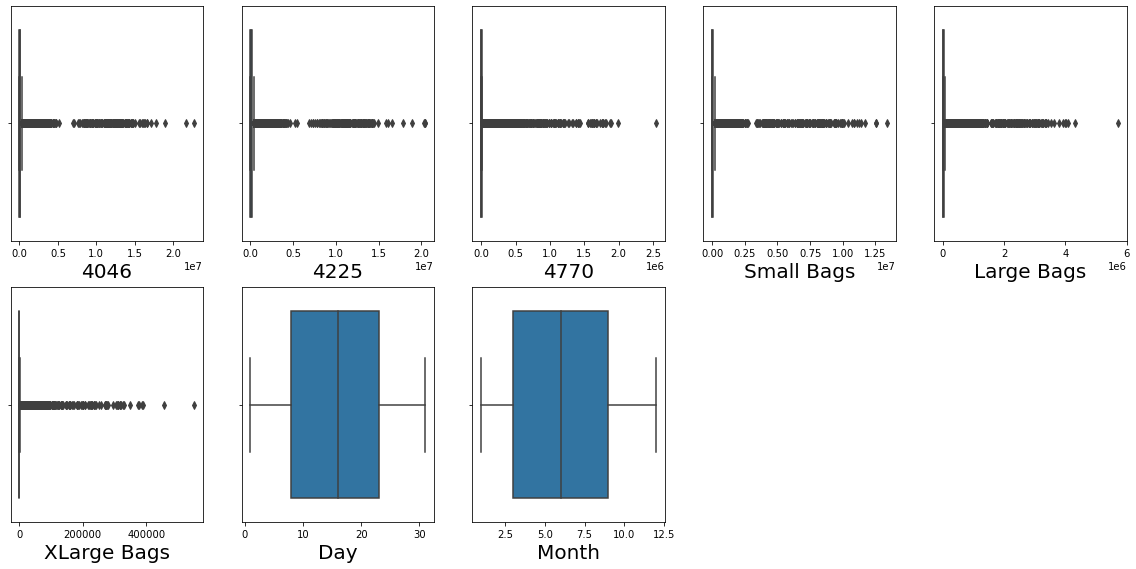

In [36]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in DF.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There are outliers in all of the above columns

### Removing Outliers

#### Removing Outliers using Z score Method

In [37]:
df2 =DF.drop(columns = ['year','type','region','AveragePrice'],axis=1).copy() #making a copy of all continuous data type columns.

In [38]:
df2

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Day,Month
0,1036.74,54454.85,48.16,8603.62,93.25,0.0,27,12
1,674.28,44638.81,58.33,9408.07,97.49,0.0,20,12
2,794.70,109149.67,130.50,8042.21,103.14,0.0,13,12
3,1132.00,71976.41,72.58,5677.40,133.76,0.0,6,12
4,941.48,43838.39,75.78,5986.26,197.69,0.0,29,11
...,...,...,...,...,...,...,...,...
18244,2046.96,1529.20,0.00,13066.82,431.85,0.0,4,2
18245,1191.70,3431.50,0.00,8940.04,324.80,0.0,28,1
18246,1191.92,2452.79,727.94,9351.80,42.31,0.0,21,1
18247,1527.63,2981.04,727.01,10919.54,50.00,0.0,14,1


In [39]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [40]:
df3.shape

(17782, 8)

In [41]:
df2.shape

(18249, 8)

##### Data loss %:

In [42]:
loss=(18249-17782)/18249 * 100
loss

2.55904433119623

2.55% Data loss is within acceptable range

#### Using IQR Method

In [43]:
df =DF.drop(columns = ['year','type','region','AveragePrice'],axis=1).copy() #making a copy of all continuous data type columns.

In [44]:
indxdrop = np.array([])
for colm in df:
    q1 = df[colm].quantile(0.25)
    q3 = df[colm].quantile(0.75)
    iqr = q3-q1
    upperval = q3 + (1.5*iqr)
    lowerval = q1 - (1.5*iqr)
    col = df[colm]
    indx = col[(col > upperval) | (col < lowerval)].index
    indxdrop = np.append(indxdrop, indx)
# find all the indices of outliers in the columns using IQR and append them to indxdrop array 

In [45]:
indxdrop 

array([   52.,    54.,    55., ...,  9121., 18220., 18232.])

In [46]:
df = df.drop(indxdrop)

In [47]:
df.shape

(11747, 8)

##### Data loss %:

In [48]:
loss=(18249-11747)/18249 * 100
loss

35.62934955340019

35.62% data loss is outside acceptable range.

#### Therefore, Using Z score method to reduce outliers

In [49]:
dropindx = DF.index.difference(df3.index)

In [50]:
dropindx

Int64Index([ 346,  359,  780,  781,  783,  787,  788,  790,  791,  792,
            ...
            9104, 9105, 9106, 9107, 9108, 9109, 9110, 9111, 9112, 9113],
           dtype='int64', length=467)

In [51]:
DF.drop(dropindx,inplace = True) #dropping the outliers from original features Dataframe


In [52]:
DF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany,27,12
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany,20,12
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany,13,12
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany,29,11
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,2046.96,1529.20,0.00,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,1191.70,3431.50,0.00,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1
18246,1.87,1191.92,2452.79,727.94,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1
18247,1.93,1527.63,2981.04,727.01,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1


In [53]:
DF.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

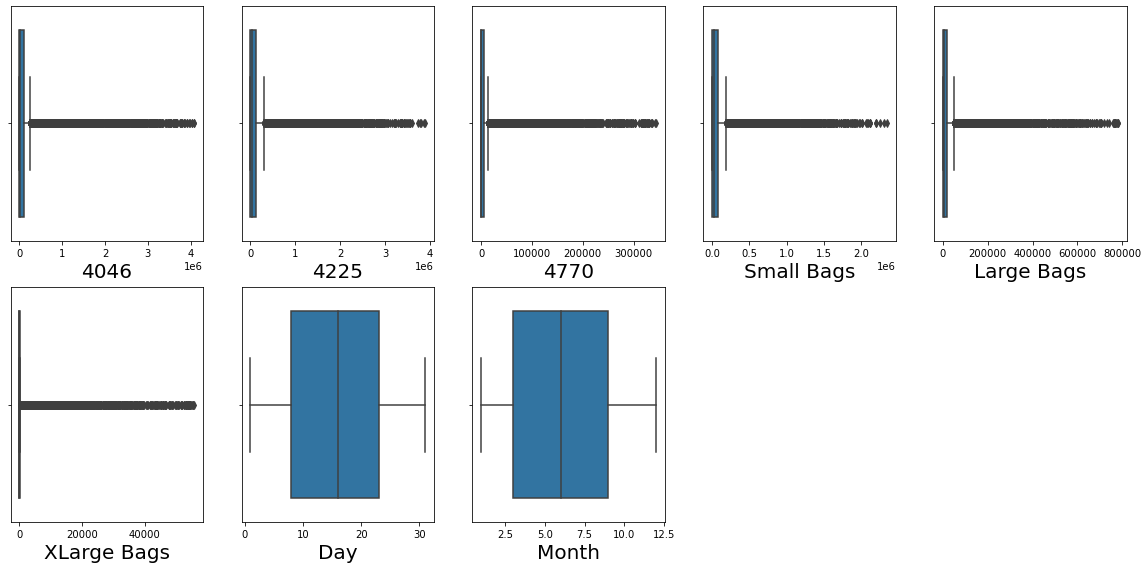

In [54]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in DF.drop(columns = ['year','type','region','AveragePrice'],axis=1):
    if plotnum<=11:
        plt.subplot(5,5,plotnum)
        sns.boxplot(DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Some amount of outliers has been removed.

### Checking for skewness in data distributions

In [55]:
DF.skew()

AveragePrice    0.560969
4046            4.928850
4225            4.472729
4770            5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

#### Normalizing Data Distribution using PowerTransformer

In [56]:
from sklearn.preprocessing import PowerTransformer

In [57]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [58]:
df4 = DF.drop(columns = ['year','type','region','AveragePrice'],axis=1)

In [59]:
transformed= powtrans.fit_transform(df4)

In [60]:
type(transformed)

numpy.ndarray

In [61]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe


In [62]:
transformed.skew()

4046          -0.038259
4225          -0.043246
4770           0.028015
Small Bags    -0.024657
Large Bags    -0.110061
XLarge Bags    0.860603
Day           -0.209306
Month         -0.149112
dtype: float64

In [63]:
transformed.index = DF.index

In [64]:
Skewed = ['4046','4225','4770','Small Bags','Large Bags','XLarge Bags']

In [65]:
DF[Skewed] = transformed[Skewed]

In [66]:
DF.skew()

AveragePrice    0.560969
4046           -0.038259
4225           -0.043246
4770            0.028015
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Day             0.011251
Month           0.098217
dtype: float64

A lot of skewness has been removed.

In [67]:
DFtest = DF.head(300) #taking a small sample of the main dataframe to analyse the skewness of data in the continuous type feature columns

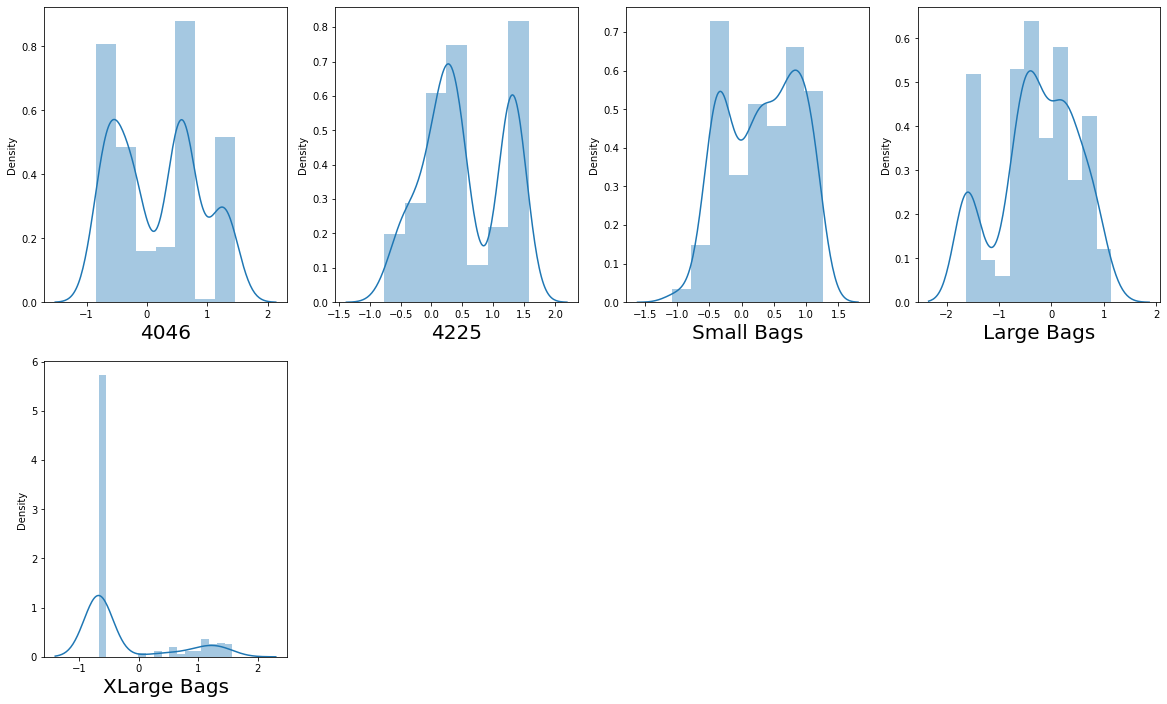

In [68]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1
for col in DFtest[['4046','4225','Small Bags','Large Bags','XLarge Bags']]:
    if plotnum<=10:
        plt.subplot(4,4,plotnum)
        sns.distplot(DFtest[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

Data Distribution looks much more normalised now.

### Encoding Categorical Columns

####  Encoding 'type' using get_dummies()

In [69]:
dumm = pd.get_dummies(DF[['type']],drop_first = False)

In [70]:
dumm

,type_conventional,type_organic
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
17777,0,1
17778,0,1
17779,0,1
17780,0,1


In [71]:
DF = DF.join(dumm)

In [72]:
DF.drop(columns = ['type'],inplace=True)

In [73]:
DF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,Albany,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,Albany,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,Albany,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,Albany,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,Albany,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,WestTexNewMexico,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,WestTexNewMexico,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,WestTexNewMexico,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,WestTexNewMexico,14,1,0,1


#### Encoding 'region' using Label Encoder

In [74]:
from sklearn.preprocessing import LabelEncoder

In [75]:
labenc = LabelEncoder()

In [76]:
DF.region = labenc.fit_transform(DF.region)

In [77]:
DF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,0,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,0,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,0,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,0,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,0,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,53,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,53,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,53,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,53,14,1,0,1


### Finding Correlation 

In [78]:
a_corr =DF.corr()

In [79]:
a_corr.head(23)

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
AveragePrice,1.000000,-0.548618,-0.448579,-0.491320,-0.493621,-0.477879,-0.387285,0.099910,0.010428,0.024742,0.157900,-0.608447,0.608447
4046,-0.548618,1.000000,0.764679,0.736523,0.778765,0.601899,0.573880,-0.002396,0.159390,-0.004558,-0.025919,0.725826,-0.725826
4225,-0.448579,0.764679,1.000000,0.796799,0.784901,0.614878,0.584508,-0.004533,0.032273,-0.005919,-0.024708,0.747722,-0.747722
4770,-0.491320,0.736523,0.796799,1.000000,0.754305,0.548457,0.616413,-0.051657,0.037805,0.001383,-0.017377,0.780988,-0.780988
Small Bags,-0.493621,0.778765,0.784901,0.754305,1.000000,0.566307,0.603334,0.185955,0.051985,-0.000535,-0.010260,0.720466,-0.720466
Large Bags,-0.477879,0.601899,0.614878,0.548457,0.566307,1.000000,0.452650,0.190295,0.086573,-0.000876,-0.016942,0.500026,-0.500026
XLarge Bags,-0.387285,0.573880,0.584508,0.616413,0.603334,0.452650,1.000000,0.159574,-0.020865,0.010241,0.018751,0.665587,-0.665587
year,0.099910,-0.002396,-0.004533,-0.051657,0.185955,0.190295,0.159574,1.000000,-0.003610,0.004044,-0.173166,-0.007399,0.007399
region,0.010428,0.159390,0.032273,0.037805,0.051985,0.086573,-0.020865,-0.003610,1.000000,0.000751,0.002175,-0.021970,0.021970
Day,0.024742,-0.004558,-0.005919,0.001383,-0.000535,-0.000876,0.010241,0.004044,0.000751,1.000000,0.010456,0.002469,-0.002469


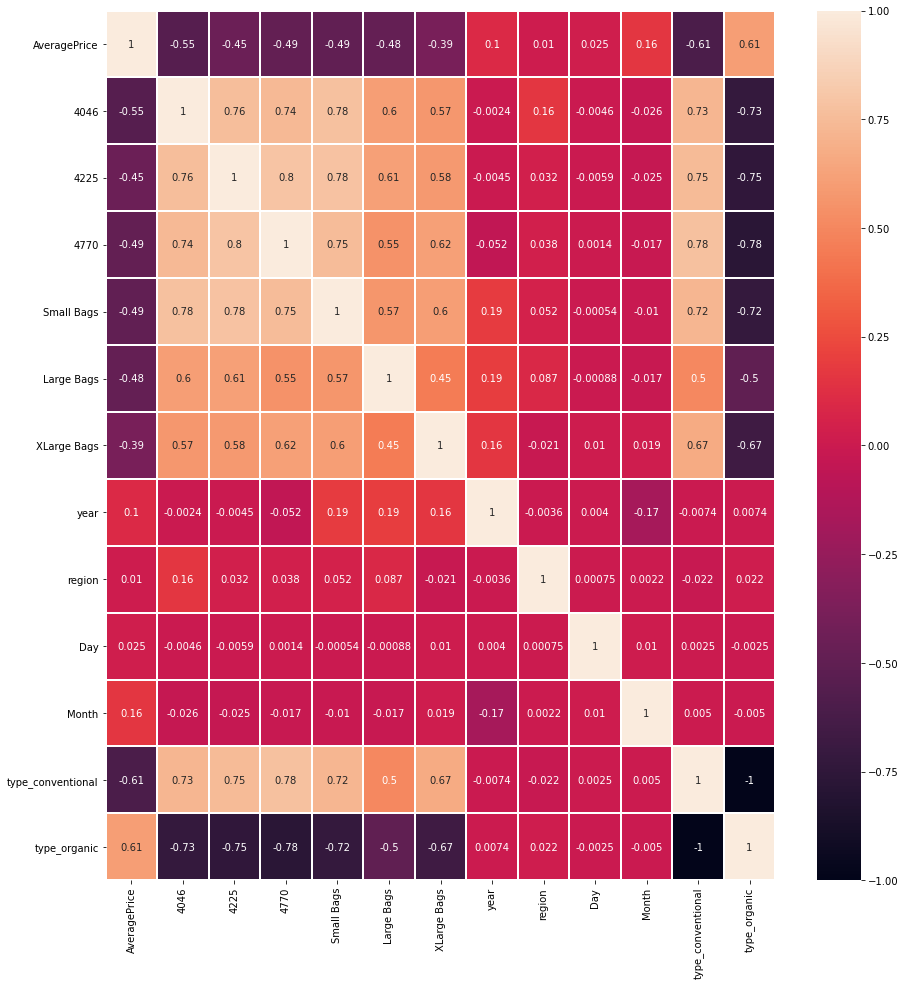

In [80]:
plt.figure(figsize=(15,16))
sns.heatmap(a_corr,annot=True,linewidth=1)
plt.show()

### Visualizing correlation of feature columns with label column.

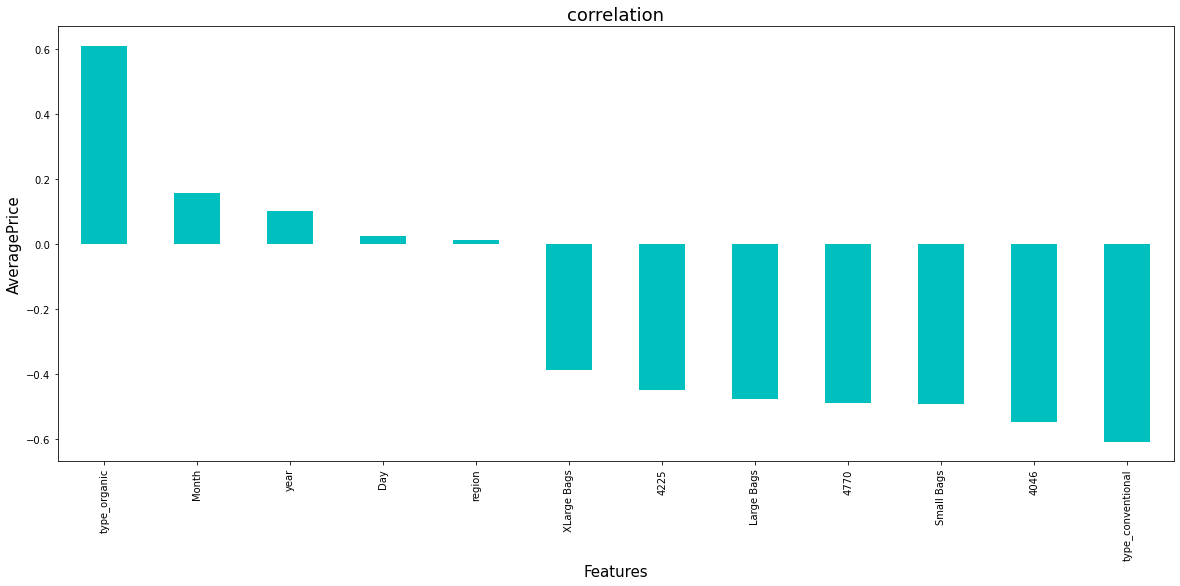

In [81]:
plt.figure(figsize = (20,8))
DF.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

#### From the above graph it can be observed that 'type_organic' has the highest positive correlation with 'AveragePrice', 'type_conventional' has the highest negative correlation while 'region' has the weakest correlation.

### Feature Selection

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
X =DF.drop(columns=['AveragePrice'])
y =DF['AveragePrice']

In [84]:
scaler= StandardScaler()

In [85]:
scaled_X = scaler.fit_transform(X)

### Checking for Multicollinearity using Variance Inflation Factor

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
vif = pd.DataFrame()

In [88]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [89]:
vif

,Features,vif
0,4046,3.723160
1,4225,4.139977
2,4770,3.940502
3,Small Bags,4.103569
4,Large Bags,1.866024
5,XLarge Bags,2.039339
6,year,1.359839
7,region,1.079283
8,Day,1.000506
9,Month,1.051207


There is no multicollinearity

### Selecting Kbest Features

In [90]:
from sklearn.feature_selection import SelectKBest, f_classif

In [91]:
bestfeat = SelectKBest(score_func = f_classif, k = 12)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [92]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(22,'Score'))

              Feature      Score
11       type_organic  49.966168
10  type_conventional  49.966168
0                4046  36.480181
2                4770  27.651101
3          Small Bags  25.039951
4          Large Bags  23.354747
1                4225  21.772853
5         XLarge Bags  15.065353
6                year   3.163539
9               Month   2.850599
7              region   1.291093
8                 Day   1.249095


Selecting the best features based on scores above

In [93]:
xbest = X.drop(columns=['region','Day'])

In [94]:
xbest

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,Month,type_conventional,type_organic
0,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,12,1,0
1,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,12,1,0
2,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,12,1,0
3,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,12,1,0
4,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,11,1,0
...,...,...,...,...,...,...,...,...,...,...
17777,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,2,0,1
17778,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,1,0,1
17779,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,1,0,1
17780,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,1,0,1


In [95]:
xbest_ss = scaler.fit_transform(xbest) #Scaling features using Standard Scaler

#### The Data to be predicted in Target / Label column is continuous in nature since it is the Average Price. Therefore Regression Models will be used.

## Regression Model Building

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
from sklearn.metrics import r2_score

#### Finding the Best Random State

In [98]:
from sklearn.ensemble import RandomForestRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state = i)
    modRF =  RandomForestRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.872371889237333 on random_state: 11


In [104]:
x_train,x_test,y_train,y_test = train_test_split(xbest_ss,y,test_size = .33, random_state =11)

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [106]:
from sklearn.metrics import r2_score,mean_squared_error

In [107]:
RF = RandomForestRegressor()
DT = DecisionTreeRegressor()
SVR= SVR()
R=Ridge()

### Training the Models

In [108]:
models=[RF,DT,SVR,R]
for m in models:
    print(m,"Results:")
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("r2_score:",r2_score(y_test,y_pred))
    print("MSE :",mean_squared_error(y_test,y_pred))
    print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))
    print("\n")

RandomForestRegressor() Results:
r2_score: 0.8704974232600348
MSE : 0.021070545968648834
RMSE : 0.14515697010012588


DecisionTreeRegressor() Results:
r2_score: 0.7131765288879273
MSE : 0.046667234622593284
RMSE : 0.2160260045054606


SVR() Results:
r2_score: 0.7759036796926365
MSE : 0.036461296271521774
RMSE : 0.19094841259230666


Ridge() Results:
r2_score: 0.5116272273529452
MSE : 0.0794600479383405
RMSE : 0.28188658701389196




### Model Cross Validation

In [109]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression

In [110]:
for m in models:
    print(m,"Results:")
    print(cross_val_score(m,xbest_ss,y,cv=ShuffleSplit(5)).mean())

RandomForestRegressor() Results:
0.8792427723977163
DecisionTreeRegressor() Results:
0.744153504232464
SVR() Results:
0.7701289717392609
Ridge() Results:
0.500324123019122


### Based on comparing Accuracy Score results with Cross Validation results, it is determined that Random Forest Regressor is the best model. It also has the lowest Root Mean Squared Error score

### Hyper Parameter Tuning

#### Random Forest Regressor

In [111]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [118]:
GridCV = GridSearchCV(RandomForestRegressor(),parameter,cv=2,n_jobs = -1,verbose = 1)

In [119]:
GridCV.fit(x_train,y_train)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [120]:
GridCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 60}

In [121]:
Best_mod = RandomForestRegressor(n_estimators = 60,criterion = 'mse', max_depth= 20, max_features = 'auto',min_samples_leaf = 5, min_samples_split = 5)


In [122]:
Best_mod.fit(x_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=5, min_samples_split=5,
                      n_estimators=60)

In [123]:
rfpred = Best_mod.predict(x_test)
acc = r2_score(y_test,rfpred)
print(acc*100)


84.88308086375172


##### Random Forest Regressor has an accuracy of 84.88%

#### Saving The Model

In [124]:
import joblib
joblib.dump(Best_mod,"BestModelAvocado.pkl")

['BestModelAvocado.pkl']

#### Loading The Model

In [125]:
mod=joblib.load("BestModelAvocado.pkl")

In [126]:
print(mod.predict(x_test))

[1.40426414 1.13473467 1.12097656 ... 1.29305807 2.07729052 1.29114282]


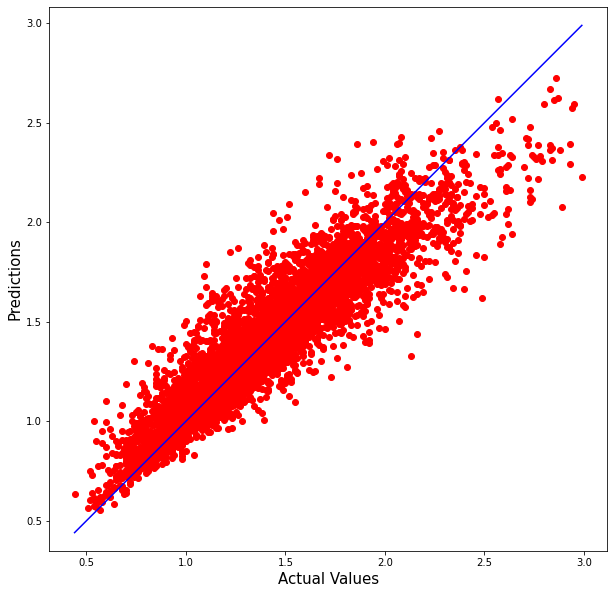

In [127]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, rfpred, c='red')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(rfpred), max(y_test))
p2 = min(min(rfpred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

# Now 2nd part where target variable is region

# This is a Classification Problem since the Target variable / Label column ("region") has Catergorical type of Data.

<AxesSubplot:xlabel='region', ylabel='count'>

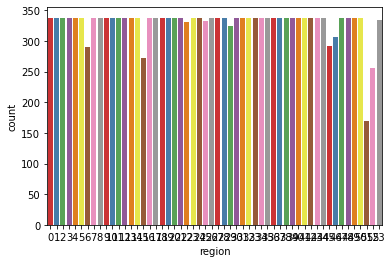

In [129]:
sns.countplot(DF['region'], palette="Set1")

In [130]:
h_corr = DF.corr()
h_corr

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
AveragePrice,1.000000,-0.548618,-0.448579,-0.491320,-0.493621,-0.477879,-0.387285,0.099910,0.010428,0.024742,0.157900,-0.608447,0.608447
4046,-0.548618,1.000000,0.764679,0.736523,0.778765,0.601899,0.573880,-0.002396,0.159390,-0.004558,-0.025919,0.725826,-0.725826
4225,-0.448579,0.764679,1.000000,0.796799,0.784901,0.614878,0.584508,-0.004533,0.032273,-0.005919,-0.024708,0.747722,-0.747722
4770,-0.491320,0.736523,0.796799,1.000000,0.754305,0.548457,0.616413,-0.051657,0.037805,0.001383,-0.017377,0.780988,-0.780988
Small Bags,-0.493621,0.778765,0.784901,0.754305,1.000000,0.566307,0.603334,0.185955,0.051985,-0.000535,-0.010260,0.720466,-0.720466
Large Bags,-0.477879,0.601899,0.614878,0.548457,0.566307,1.000000,0.452650,0.190295,0.086573,-0.000876,-0.016942,0.500026,-0.500026
XLarge Bags,-0.387285,0.573880,0.584508,0.616413,0.603334,0.452650,1.000000,0.159574,-0.020865,0.010241,0.018751,0.665587,-0.665587
year,0.099910,-0.002396,-0.004533,-0.051657,0.185955,0.190295,0.159574,1.000000,-0.003610,0.004044,-0.173166,-0.007399,0.007399
region,0.010428,0.159390,0.032273,0.037805,0.051985,0.086573,-0.020865,-0.003610,1.000000,0.000751,0.002175,-0.021970,0.021970
Day,0.024742,-0.004558,-0.005919,0.001383,-0.000535,-0.000876,0.010241,0.004044,0.000751,1.000000,0.010456,0.002469,-0.002469


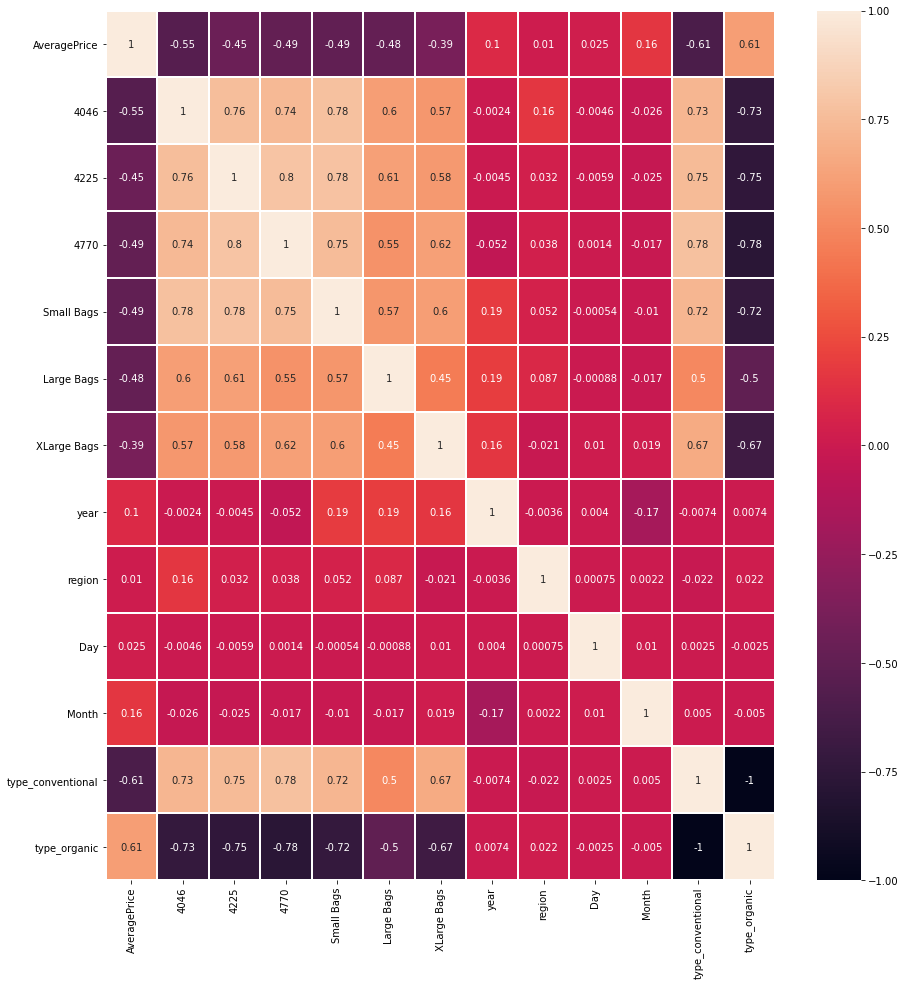

In [131]:
plt.figure(figsize=(15,16))
sns.heatmap(h_corr,annot=True,linewidth=1)
plt.show()

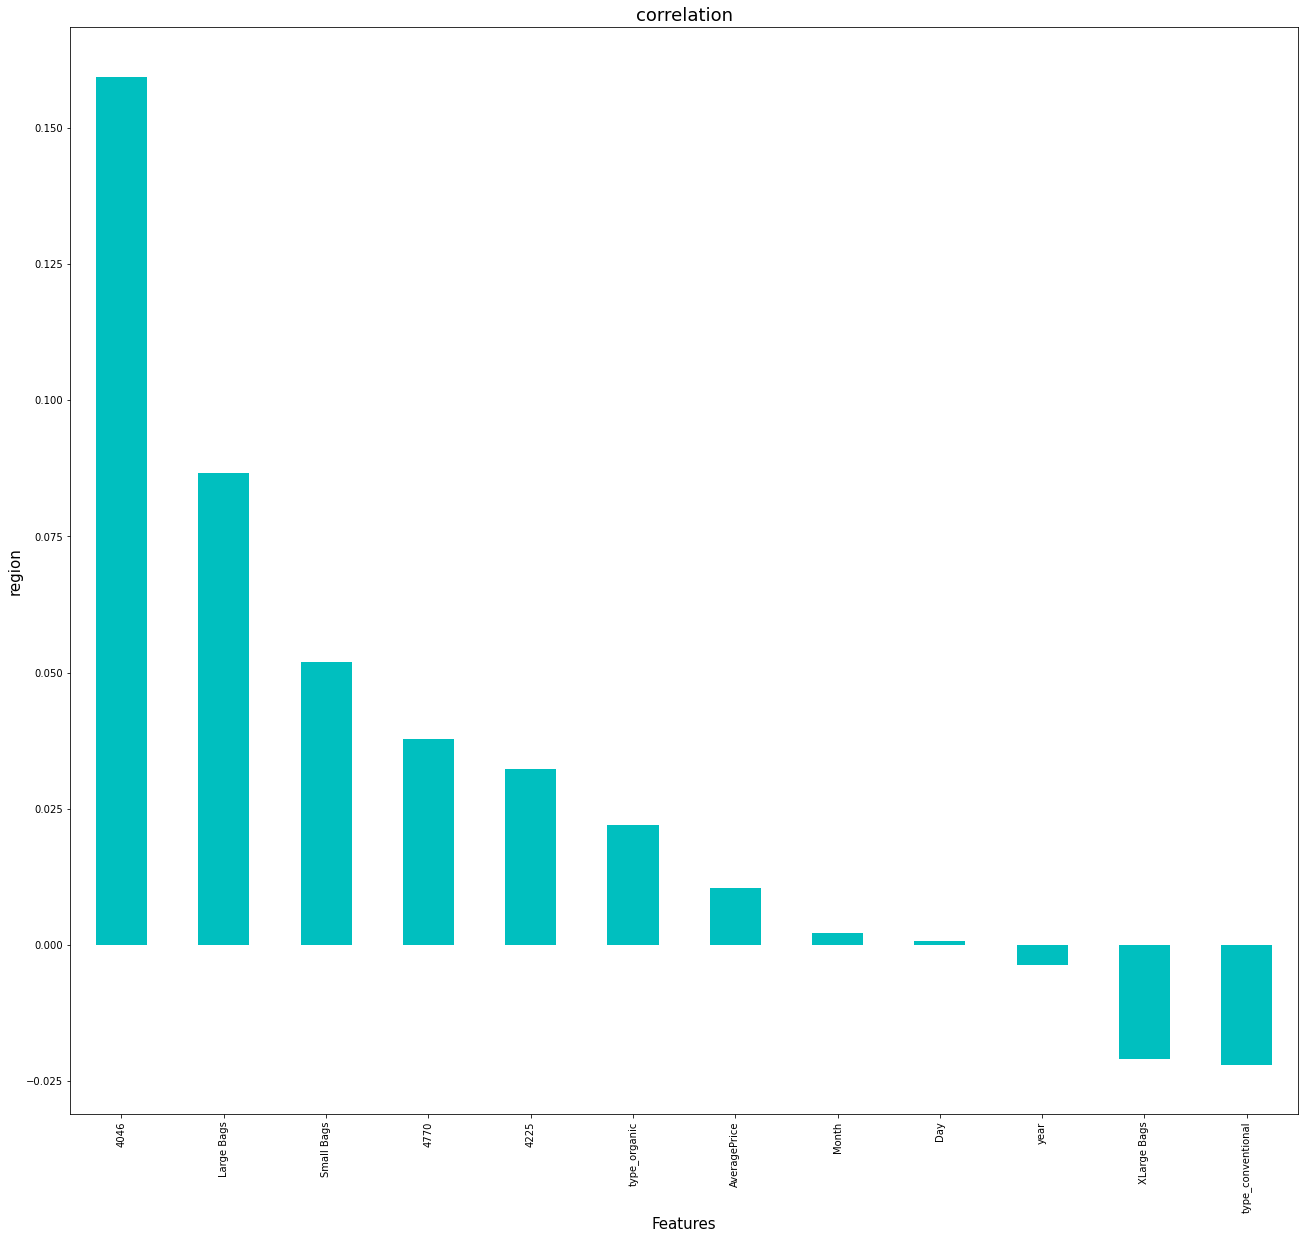

In [132]:
plt.figure(figsize = (22,20))
DF.corr()['region'].sort_values(ascending = False).drop(['region']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('region',fontsize=15)
plt.title('correlation',fontsize = 18)
plt.show()

# type_conventional,XLarge Bags,year has negative correlation whereas 4046, Large Bags and Small bags has highly positive correlation with region

In [195]:
DF

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,year,region,Day,Month,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,2015,0,27,12,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,2015,0,20,12,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,2015,0,13,12,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,2015,0,6,12,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,2015,0,29,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,2018,53,4,2,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,2018,53,28,1,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,2018,53,21,1,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,2018,53,14,1,0,1


In [196]:
X = DF.drop(columns = ['region'])
y = DF['region']

### Feature Selection

In [197]:
from sklearn.preprocessing import StandardScaler

In [198]:
scaler= StandardScaler()
scaled_X = scaler.fit_transform(X)

In [199]:
scaled_X 

array([[-0.21266011, -0.64991752,  0.35827836, ...,  1.64143354,
         1.02644331, -1.02644331],
       [-0.16294184, -0.77006683,  0.27635525, ...,  1.64143354,
         1.02644331, -1.02644331],
       [-1.20702555, -0.72450758,  0.65600965, ...,  1.64143354,
         1.02644331, -1.02644331],
       ...,
       [ 1.12973323, -0.61035022, -0.77439502, ..., -1.4685724 ,
        -0.97423793,  0.97423793],
       [ 1.27888805, -0.53921073, -0.7116048 , ..., -1.4685724 ,
        -0.97423793,  0.97423793],
       [ 0.50825483, -0.35150339, -0.78720881, ..., -1.4685724 ,
        -0.97423793,  0.97423793]])

### Checking for Multicollinearity using Variance Inflation Factor

In [139]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [140]:
vif = pd.DataFrame()

In [141]:
vif["Features"] = X.columns
vif['vif'] = [variance_inflation_factor(scaled_X,i) for i in range(scaled_X.shape[1])]

In [142]:
vif

,Features,vif
0,AveragePrice,2.029775
1,4046,3.565763
2,4225,4.355122
3,4770,3.958815
4,Small Bags,4.188423
5,Large Bags,2.067959
6,XLarge Bags,2.034786
7,year,1.468445
8,Day,1.001628
9,Month,1.131188


### Principle Component Analysis

In [143]:
from sklearn.decomposition import PCA

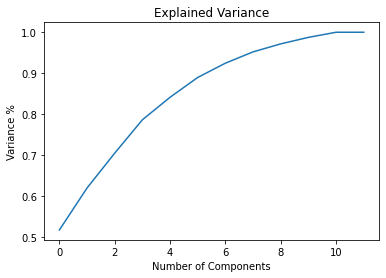

In [144]:
pca = PCA()
principleComponents = pca.fit_transform(scaled_X)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance')
plt.show()

10 components explain around 95% variance in Data

In [145]:
pca = PCA(n_components=10)
new_comp = pca.fit_transform(scaled_X)
principle_x=pd.DataFrame(new_comp,columns=np.arange(10))

In [146]:
principle_x

,0,1,2,3,4,5,6,7,8,9
0,0.048749,-2.303482,-1.129821,-0.654833,-0.431111,-0.706817,-0.901412,-0.901161,0.039389,0.645180
1,-0.002407,-2.289782,-0.556289,-0.105078,-0.496654,-0.704353,-0.874921,-0.959452,0.127053,0.605532
2,0.478657,-2.369799,0.363171,0.108625,-0.182830,-1.142549,-0.987113,-0.743504,0.516177,0.747645
3,0.268925,-2.334990,0.852439,0.742414,-0.269978,-1.018129,-0.871247,-0.860691,0.204782,0.632300
4,0.082899,-2.141433,-1.120974,-1.006217,-0.331192,-0.752818,-0.762629,-1.021731,0.079514,0.500670
...,...,...,...,...,...,...,...,...,...,...
17777,-2.084871,2.426037,0.962101,0.918517,-0.053869,-0.091917,-0.518667,0.344650,-0.272033,0.037953
17778,-2.175791,2.543890,-0.988602,-1.015065,-0.129944,0.114718,-0.453728,0.164280,-0.225205,0.219346
17779,-1.849479,2.328917,-0.492321,-0.423783,-0.789230,0.800961,-0.546403,0.048001,0.641116,-0.955918
17780,-1.809859,2.349924,0.044547,0.166279,-0.827944,0.959650,-0.534053,0.033965,0.569708,-0.942600


In [189]:
from sklearn.feature_selection import SelectKBest, f_classif

In [191]:
bestfeat = SelectKBest(score_func = f_classif, k = 11)
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [192]:
fit = bestfeat.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(11,'Score'))

              Feature       Score
1                4046  180.309702
5          Large Bags  159.457692
2                4225  142.620675
4          Small Bags  128.822420
3                4770   83.840618
0        AveragePrice   66.630123
6         XLarge Bags   27.397082
10  type_conventional    4.159580
11       type_organic    4.159580
7                year    0.378935
9               Month    0.095671


## Classification Model Building

In [200]:
x_best=X.drop(columns=['year','Month'])

In [201]:
x_best

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Day,type_conventional,type_organic
0,1.33,-0.649918,0.358278,-0.212550,-0.337064,-0.775214,-0.675702,27,1,0
1,1.35,-0.770067,0.276355,-0.165117,-0.301038,-0.765237,-0.675702,20,1,0
2,0.93,-0.724508,0.656010,0.034215,-0.364044,-0.752534,-0.675702,13,1,0
3,1.08,-0.625017,0.475615,-0.110976,-0.500341,-0.693012,-0.675702,6,1,0
4,1.28,-0.677083,0.268966,-0.100289,-0.479918,-0.600755,-0.675702,29,1,0
...,...,...,...,...,...,...,...,...,...,...
17777,1.63,-0.454078,-0.922232,-1.224990,-0.165765,-0.405895,-0.675702,4,0,1
17778,1.71,-0.610403,-0.665649,-1.224990,-0.321645,-0.478556,-0.675702,28,0,1
17779,1.87,-0.610350,-0.774395,0.455355,-0.303466,-0.945246,-0.675702,21,0,1
17780,1.93,-0.539211,-0.711605,0.455045,-0.240252,-0.910471,-0.675702,14,0,1


In [202]:
scaled_x_best = scaler.fit_transform(x_best)

In [203]:
from sklearn.linear_model import LogisticRegression
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31, random_state = i,stratify = y)
    modRF =  LogisticRegression()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.48430981316887356 on random_state: 27


In [204]:
x_train,x_test,y_train,y_test = train_test_split(scaled_x_best,y,test_size = .31,random_state = 27)

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [206]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [207]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [214]:
def max_acu_score (regr, x, y):
    max_acu_score = 0
    for r_state in range (42, 100):

        x_train, x_test, y_train, y_test = train_test_split(scaled_x_best, y, random_state=r_state, test_size=.20)

        regr.fit(x_train, y_train)
        y_pred = regr.predict(x_test)
        acu_scr = accuracy_score(y_test, y_pred)


        #print ("\n accuracy score corresponding to state: ", r_state, " is: ", acu_scr)
        if (acu_scr > max_acu_score):
            max_acu_score = acu_scr
            final_r_state = r_state
    print ("\nMax accuracy score corresponding to ", final_r_state, " is: ", max_acu_score)
    return final_r_state

In [209]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
GNB =  GaussianNB()
KNN = KNeighborsClassifier()
LR=LogisticRegression()

In [210]:
models=[DTC,RFC,ABC,GNB,KNN,LR]

In [220]:
from sklearn.metrics import auc

****************** DecisionTreeClassifier() *********************



Max accuracy score corresponding to  79  is:  0.49142535844813046
DecisionTreeClassifier()


Accuracy score:  0.778175313059034


cross val score:  0.6311940139017193


roc auc score:  0.19794645178060818


classification report:                precision    recall  f1-score   support

           0       0.76      0.75      0.75        76
           1       0.68      0.70      0.69        66
           2       0.92      0.87      0.89        87
           3       0.75      0.80      0.77        74
           4       0.83      0.73      0.78        82
           5       0.67      0.72      0.69        83
           6       0.98      0.93      0.95        57
           7       0.85      0.72      0.78        87
           8       0.96      0.93      0.94        82
           9       0.72      0.79      0.75        75
          10       0.68      0.59      0.63        70
          11       0.79      0.80      0.79        

AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************** GaussianNB() *********************



Max accuracy score corresponding to  79  is:  0.49142535844813046
GaussianNB()


Accuracy score:  0.07692307692307693


cross val score:  0.05550482412295428


roc auc score:  0.5977896983875668


classification report:                precision    recall  f1-score   support

           0       0.04      0.25      0.07        76
           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        87
           3       0.29      0.11      0.16        74
           4       0.00      0.00      0.00        82
           5       0.00      0.00      0.00        83
           6       0.15      0.05      0.08        57
           7       0.00      0.00      0.00        87
           8       0.14      0.02      0.04        82
           9       0.18      0.27      0.22        75
          10       0.00      0.00      0.00        70
          11       0.00    

AxesSubplot(0.125,0.808774;0.62x0.0712264)





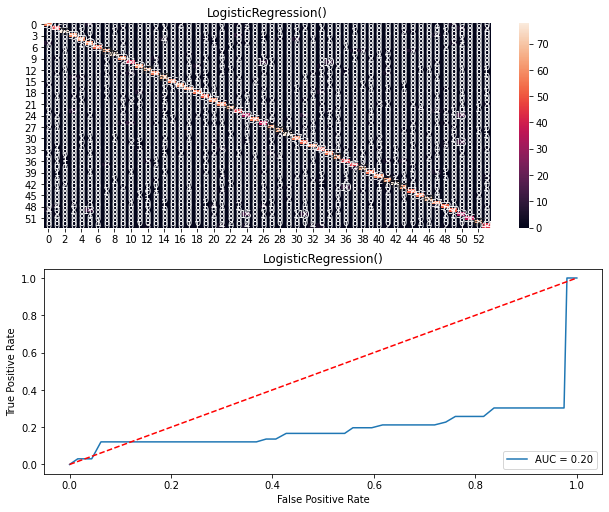

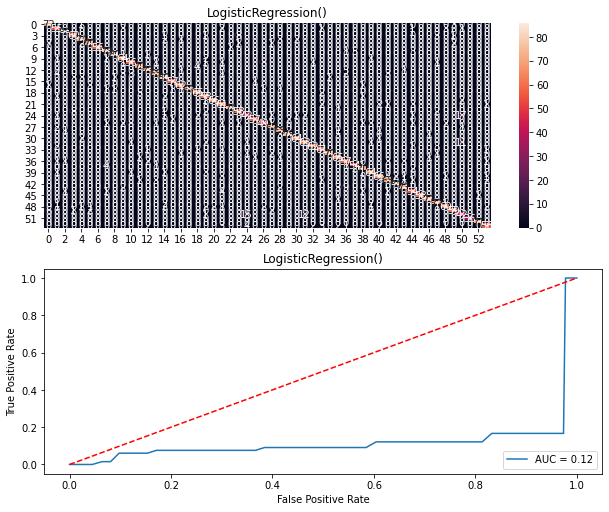

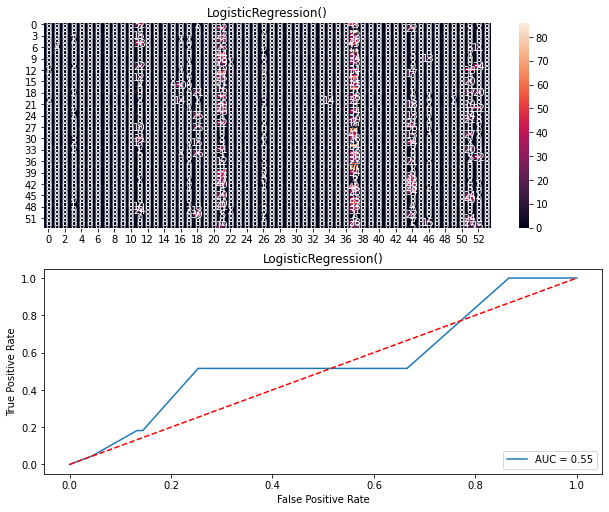

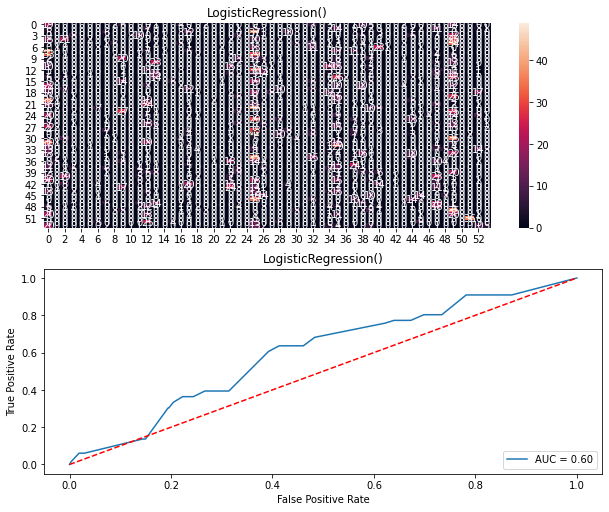

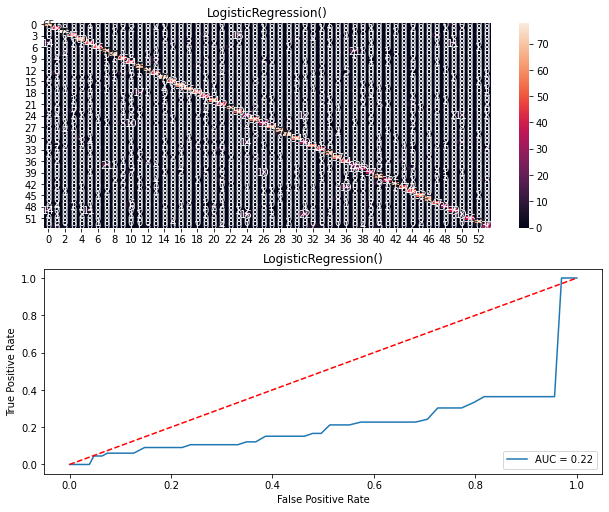

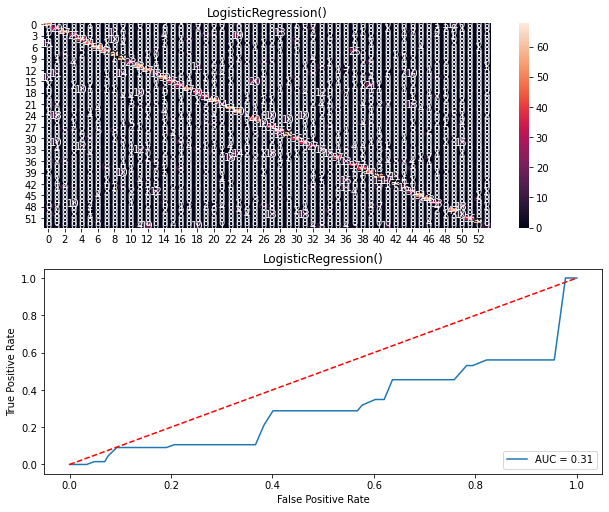

In [225]:
Model = []
score = []
cvs = []
rocscore = []
rstate = []

for model in models:    
    print ('******************', model , '*********************')
    print ("\n")
    
    model_state = max_acu_score(m, scaled_x_best, y)
    rstate.append(model_state)
    
    x_train, x_test, y_train, y_test = train_test_split(scaled_x_best, y, random_state = model_state, test_size = .22)
    
    Model.append(model)
    model.fit (x_train, y_train)
    print (model)
    
    pre = model.predict(x_test)
    print ('\n')
    
    AS = accuracy_score(y_test, pre)
    print ("Accuracy score: ", AS)
    score.append (AS*100)
    print ('\n')
    
    sc = cross_val_score(model, scaled_x_best, y, cv =10, scoring='accuracy').mean()
    print ("cross val score: ", sc)    
    cvs.append(sc*100)
    print ('\n')
    
    fpr, tpr, thresholds = roc_curve(y_test, pre, pos_label=1)
    roc_auc = auc(fpr, tpr)
    print ("roc auc score: ", roc_auc)
    rocscore.append(roc_auc * 100)
    print ('\n')
    
    print ("classification report: ", classification_report (y_test, pre) )
    print ('\n')
    
    cm = confusion_matrix(y_test, pre)
    print (cm)
    print ('\n')
    
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(m)
    print (sns.heatmap(cm, annot=True))
     
    plt.subplot(912)
    plt.title(m)
    plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
    plt.plot ([0,1], [0,1], 'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print ('\n\n')


I choose RandomForestClassifier as my final model because it performs well on dataset

In [238]:
# GridSearchCV for RandomForestClassifier
parameters = { 'n_estimators': [100,200,300,500,1000], 'criterion': ['gini', 'entropy'], 'max_features':
              ['auto', 'sqrt', 'log2']
}
gsc = GridSearchCV(estimator = RFC, param_grid = parameters, cv=2)
gsc.fit(scaled_x_best,y)
gsc.best_params_

{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}

In [239]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x_best, y, random_state=79, test_size = 0.20)
rfc = RandomForestClassifier(criterion= 'gini', max_features='log2', n_estimators= 100)
rfc.fit(x_train, y_train)
y_pred =  rfc.predict(x_test)
print (y_pred)

[20 10  3 ... 41 34 12]


In [240]:
dft = pd.DataFrame(y_pred)
dft.to_csv ('pred_cls_avocado.csv')

accuracy score:  0.8928872645487771
Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        74
           1       0.81      0.81      0.81        57
           2       0.94      0.97      0.96        79
           3       0.87      0.86      0.86        69
           4       0.93      0.95      0.94        74
           5       0.88      0.88      0.88        76
           6       1.00      0.98      0.99        51
           7       0.91      0.89      0.90        76
           8       0.97      0.99      0.98        75
           9       0.91      0.85      0.88        68
          10       0.79      0.85      0.82        62
          11       0.89      0.99      0.93        71
          12       0.96      0.99      0.97        72
          13       0.86      0.81      0.84        75
          14       0.84      0.88      0.86        76
          15       0.98      0.98      0.98        52
          16       

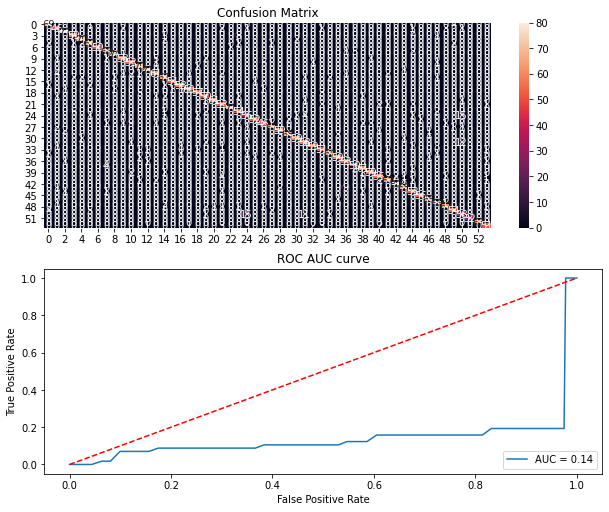

In [241]:
print ("accuracy score: ", accuracy_score(y_test, y_pred))
print ("Classification Report : \n", classification_report (y_test, y_pred))
print ("Confusion_matrix: ", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

sc = cross_val_score(rfc, scaled_x_best, y, cv =10, scoring='accuracy').mean()
print ("cross val score: ", sc)    

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
roc_auc = auc(fpr, tpr)
print ("roc auc score: ", roc_auc)
   
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title("Confusion Matrix")
print (sns.heatmap(cm, annot=True))
     
plt.subplot(912)
plt.title("ROC AUC curve")
plt.plot(fpr, tpr, label='AUC = %0.2f'%(roc_auc))
plt.plot ([0,1], [0,1], 'r--')
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print ('\n\n')

In [243]:
# saving the model 

import joblib
joblib.dump(rfc, 'Prj_cls_avocado.pkl')
#clf = joblib.load('Prj_cls_avocado.pkl')
#clf.predict(x_test)

['Prj_cls_avocado.pkl']